In [1]:
#Librerias
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import *
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import seaborn as sns
import glob as gb

In [2]:
nbatch = 8
#Carga del dataset
data_with_aug = ImageDataGenerator(horizontal_flip=True,vertical_flip=False,rescale = 1./255,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)


training_set = data_with_aug.flow_from_directory('FakeRealDataset/training/',
                                                 target_size=(512,512),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary',subset="training")

val = data_with_aug.flow_from_directory('FakeRealDataset/training/',
                                          class_mode="binary",
                                          target_size=(512, 512),
                                          batch_size=nbatch,
                                          subset="validation"
                                          )

test_set = test_datagen.flow_from_directory('FakeRealDataset/test/',
                                               class_mode="binary",
                                               target_size=(512,512),
                                               batch_size=nbatch,
                                               shuffle=False)




Found 1028 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Found 168 images belonging to 2 classes.


In [16]:
training_set.class_indices

{'fake': 0, 'real': 1}

In [7]:
def scheduler(epoch, lr):
    if epoch < 10:
        return 0.00001
    else:
        return lr * tf.math.exp(-0.01)

In [4]:
# Modelo convolucional.
model3 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',
                            input_shape= (512,512,3)),
            tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
            tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(32, activation=tf.nn.relu),
            tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [5]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 510, 510, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 508, 508, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 254, 254, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                  

In [9]:
#Entrenamiento del modelo
lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)
checkpoint_filepath = 'modelos/clasificadorRealFalso/model3-real-fake.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
hist =  model3.fit(training_set,
                    epochs=40,
                    callbacks=[lr_callbacks,model_checkpoint_callback],
                    validation_data=val)

Epoch 1/40
129/129 [==============================] - 47s 360ms/step - loss: 0.6883 - accuracy: 0.5350 - val_loss: 0.6346 - val_accuracy: 0.7422 - lr: 1.0000e-05
Epoch 2/40
129/129 [==============================] - 35s 273ms/step - loss: 0.6400 - accuracy: 0.6459 - val_loss: 0.5631 - val_accuracy: 0.7969 - lr: 1.0000e-05
Epoch 3/40
129/129 [==============================] - 35s 270ms/step - loss: 0.5811 - accuracy: 0.7140 - val_loss: 0.5026 - val_accuracy: 0.8281 - lr: 1.0000e-05
Epoch 4/40
129/129 [==============================] - 34s 265ms/step - loss: 0.5472 - accuracy: 0.7393 - val_loss: 0.4654 - val_accuracy: 0.8164 - lr: 1.0000e-05
Epoch 5/40
129/129 [==============================] - 35s 267ms/step - loss: 0.5075 - accuracy: 0.7578 - val_loss: 0.4290 - val_accuracy: 0.8320 - lr: 1.0000e-05
Epoch 6/40
129/129 [==============================] - 35s 272ms/step - loss: 0.4866 - accuracy: 0.7704 - val_loss: 0.4094 - val_accuracy: 0.8398 - lr: 1.0000e-05
Epoch 7/40
129/129 [========

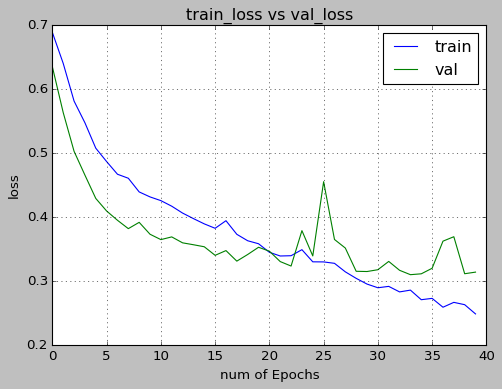

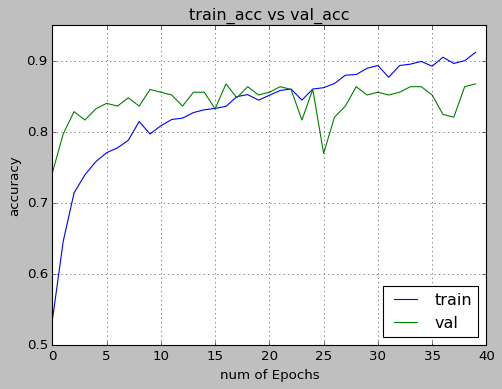

In [15]:
#Gráfica del entrenamiento
epochs = 40
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])

In [11]:
model3.load_weights('modelos/clasificadorRealFalso/model3-real-fake.h5')

C:\Users\delce\AppData\Local\Temp\ipykernel_12956\2792959500.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model3.predict_generator(test_set)


<Axes: >

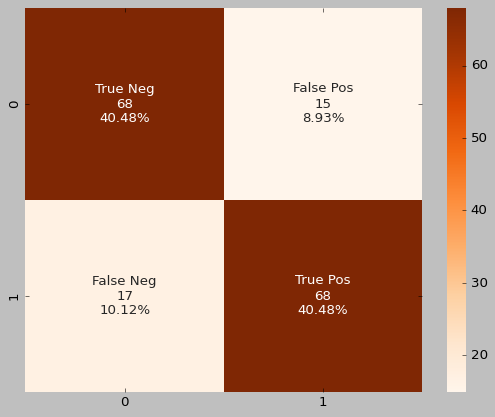

In [14]:
#Resultados y matriz de confusión
Y_pred = model3.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

cf_matrix = confusion_matrix(test_set.classes, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges')